In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load Dataset

In [2]:
df = pd.read_csv('Hearing well-being Survey Report.csv')
df

,Perceived_Hearing_Meaning,Hearing_FOMO,Hearing_Test_Barrier,Missed_Important_Sounds,Left_Out_Due_To_Hearing,Daily_Headphone_Use,Belief_Early_Hearing_Care,Last_Hearing_Test_Method,Interest_in_Hearing_App,Desired_App_Features,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest,Age_group,Ear_Discomfort_After_Use
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,I havenâ€™t thought about it much,Rarely,Never thought about it,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,1-2 hours,3,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Earphone calibration, Regular tes...",Yes,"Maybe, if it offers good value",18 - 24,Occasionally
383,Staying independent and alert,Yes often,I frequently testing by every six months,"Yes, during important work or school meetings","Yes, often",1-2 hours,5,At a hospital or clinic,"No, I don't think it's necessary","Quick tests, Regular testing reminders, Soft g...",Yes,"No, I prefer getting tested at a hospital",45 - 54,Yes
384,"Enjoying music, laughter, and life",Sometimes,Lack of awareness,"Yes, during important work or school meetings",Only in noisy places,1-2 hours,5,I've never taken a hearing test,"Maybe, if it's easy to use","Quick tests, Regular testing reminders, Soft g...",No,"No, I prefer getting tested at a hospital",18 - 24,Occasionally
385,I havenâ€™t thought about it much,Never,Lack of awareness,"No, I usually hear things well",Never,Less than 1 hour,5,At a hospital or clinic,"Maybe, if it's easy to use",Doctor consultation,No,"No, I prefer getting tested at a hospital",35 - 44,No


# Check Overall Statistics

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Perceived_Hearing_Meaning                       387 non-null    object
 1   Hearing_FOMO                                    387 non-null    object
 2   Hearing_Test_Barrier                            385 non-null    object
 3   Missed_Important_Sounds                         387 non-null    object
 4   Left_Out_Due_To_Hearing                         387 non-null    object
 5   Daily_Headphone_Use                             387 non-null    object
 6   Belief_Early_Hearing_Care                       387 non-null    int64 
 7   Last_Hearing_Test_Method                        387 non-null    object
 8   Interest_in_Hearing_App                         387 non-null    object
 9   Desired_App_Features                            387 no

In [446]:
df.nunique()

Perceived_Hearing_Meaning                          25
Hearing_FOMO                                        4
Hearing_Test_Barrier                               48
Missed_Important_Sounds                             8
Left_Out_Due_To_Hearing                             5
Daily_Headphone_Use                                 6
Belief_Early_Hearing_Care                           5
Last_Hearing_Test_Method                            6
Interest_in_Hearing_App                             5
Desired_App_Features                              205
Awareness_on_hearing_and_Willingness_to_invest      2
Paid_App_Test_Interest                              3
Age_group                                           6
Ear_Discomfort_After_Use                            5
dtype: int64

In [447]:
df.Perceived_Hearing_Meaning.unique()

array(['Staying independent and alert, Enjoying music, laughter, and life, Staying connected with the world',
       'Staying independent and alert, Staying connected with the world',
       'Staying independent and alert, I havenâ€™t thought about it much',
       'Staying independent and alert',
       'Enjoying music, laughter, and life',
       'Feeling close to loved ones, Staying independent and alert',
       'Feeling close to loved ones, Staying independent and alert, Enjoying music, laughter, and life, Staying connected with the world',
       'Enjoying music, laughter, and life, Staying connected with the world',
       'Staying connected with the world',
       'Feeling close to loved ones, Enjoying music, laughter, and life, Staying connected with the world',
       'Feeling close to loved ones, Staying independent and alert, Enjoying music, laughter, and life, Staying connected with the world, I havenâ€™t thought about it much',
       'Feeling close to loved ones, Staying

In [448]:
df.Hearing_FOMO.unique()                                    

array(['Sometimes', 'Rarely', 'Yes often', 'Never'], dtype=object)

In [449]:
df.Hearing_Test_Barrier.unique()

array(['Cost', 'Never felt the need', 'Shame', 'Lack of awareness',
       'Cost, Lack of awareness', 'Not that much required ',
       'Never had a situation to get tested.', 'Fear',
       'None of the above', 'I never had any issues ', nan,
       'Fear, Lack of awareness', 'I never thought I need one, probably?',
       'Lack of awareness, ', "I don't have a hearing problem ",
       'My hearing is good ðŸ¤·â€\x8dâ™‚ï¸\x8f',
       "Lack of awareness, Also, I haven't had the need to, yet",
       'Not finding any difficulties now', 'Na', 'Not required',
       'No hearing issues', "I don't have problem in hearing.",
       'I have good hearing ', 'i didnt feel like there is any change',
       'Never really thought about it', 'Never',
       "I didn't get any issues ", 'Not needed till now',
       'Think its perfect to me', 'Fear, ', 'Fear, Shame', 'Time',
       'Fear, Cost', 'I think my hearing is good.', 'No necessity ',
       "Didn't feel the need to ", 'no hearing issues',
 

In [450]:
df.Missed_Important_Sounds.unique()

array(['Yes, in family conversations',
       'Yes, in public spaces (trains, shops, announcements)',
       'Yes, during important work or school meetings',
       'No, I usually hear things well',
       'Iâ€™m not sure, but I have felt disconnected',
       "I can't hear claerly when tell important information in serious situation ",
       'When with friends anol',
       "When I don't pay attention while others speak "], dtype=object)

In [451]:
df.Left_Out_Due_To_Hearing.unique()

array(['Yes, often', 'Only in noisy places', 'Sometimes', 'Never',
       'I try to avoid such situations'], dtype=object)

In [452]:
df.Daily_Headphone_Use.unique()

array(['My parent(s)', 'My child/children', '1-2 hours',
       'Less than 1 hour', '2-4 hours', 'More than 4 hours'], dtype=object)

In [453]:
df.Belief_Early_Hearing_Care.unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [454]:
df.Last_Hearing_Test_Method.unique()

array(['Self - application, Loved one, AI Support', 'Self - application',
       "I've never taken a hearing test", 'At a hospital or clinic',
       'Mobile app', 'Online test'], dtype=object)

In [455]:
df.Interest_in_Hearing_App.unique()

array(['Yes', 'Maybe', 'Yes, that would be helpful',
       "No, I don't think it's necessary", "Maybe, if it's easy to use"],
      dtype=object)

In [456]:
df.Awareness_on_hearing_and_Willingness_to_invest.unique()

array(['Yes', 'No'], dtype=object)

In [457]:
df.Paid_App_Test_Interest.unique()

array(['Maybe, if it offers good value',
       'No, I prefer getting tested at a hospital', 'Yes, definitely'],
      dtype=object)

In [458]:
df.Age_group.unique()

array(['18 - 24', '25 - 34', '45 - 54', '35 - 44', 'Under 18', '55 - 64'],
      dtype=object)

In [459]:
df.Ear_Discomfort_After_Use.unique()

array(['No', 'Yes', 'Maybe', 'Occasionally', 'Not sure'], dtype=object)

In [460]:
df.describe()

,Belief_Early_Hearing_Care
count,387.000000
mean,3.958656
std,1.266690
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.Desired_App_Features.unique()

# Data Transformation

In [462]:
df['Interest_in_Hearing_App_Clean'] = df['Interest_in_Hearing_App'].replace({
'Yes': 'Yes',
'Yes, that would be helpful': 'Yes',
'Maybe': 'Maybe',
'Maybe, if it\'s easy to use': 'Maybe',
"No, I don't think it's necessary": 'No'
})

In [463]:
df.Interest_in_Hearing_App_Clean.unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [464]:
df['Ear_Discomfort_After_Use_Clean'] = df['Ear_Discomfort_After_Use'].replace({
'Yes': 'Yes',
'No': 'No',
'Maybe': 'Uncertain',
'Occasionally': 'Uncertain',
'Not sure': 'Uncertain'
})

In [465]:
df.Ear_Discomfort_After_Use_Clean.unique()

array(['No', 'Yes', 'Uncertain'], dtype=object)

In [466]:
df['Paid_App_Test_Interest_Clean'] = df['Paid_App_Test_Interest'].replace({
'Yes, definitely': 'Yes',
'Maybe, if it offers good value': 'Maybe',
'No, I prefer getting tested at a hospital': 'No'
})

In [467]:
df.Paid_App_Test_Interest_Clean.unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [468]:
df['Perceived_Hearing_Meaning'] = df['Perceived_Hearing_Meaning'].str.replace(
    "Enjoying music, laughter, and life", 
    "Enjoying music / laughter and life"
)
df['Perceived_Hearing_Meaning'].unique()

array(['Staying independent and alert, Enjoying music / laughter and life, Staying connected with the world',
       'Staying independent and alert, Staying connected with the world',
       'Staying independent and alert, I havenâ€™t thought about it much',
       'Staying independent and alert',
       'Enjoying music / laughter and life',
       'Feeling close to loved ones, Staying independent and alert',
       'Feeling close to loved ones, Staying independent and alert, Enjoying music / laughter and life, Staying connected with the world',
       'Enjoying music / laughter and life, Staying connected with the world',
       'Staying connected with the world',
       'Feeling close to loved ones, Enjoying music / laughter and life, Staying connected with the world',
       'Feeling close to loved ones, Staying independent and alert, Enjoying music / laughter and life, Staying connected with the world, I havenâ€™t thought about it much',
       'Feeling close to loved ones, Staying

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Perceived_Hearing_Meaning                       387 non-null    object
 1   Hearing_FOMO                                    387 non-null    object
 2   Hearing_Test_Barrier                            385 non-null    object
 3   Missed_Important_Sounds                         387 non-null    object
 4   Left_Out_Due_To_Hearing                         387 non-null    object
 5   Daily_Headphone_Use                             387 non-null    object
 6   Belief_Early_Hearing_Care                       387 non-null    int64 
 7   Last_Hearing_Test_Method                        387 non-null    object
 8   Interest_in_Hearing_App                         387 non-null    object
 9   Desired_App_Features                            387 no

# Explore Data

C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\2569003482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\2569003482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\2569003482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[co

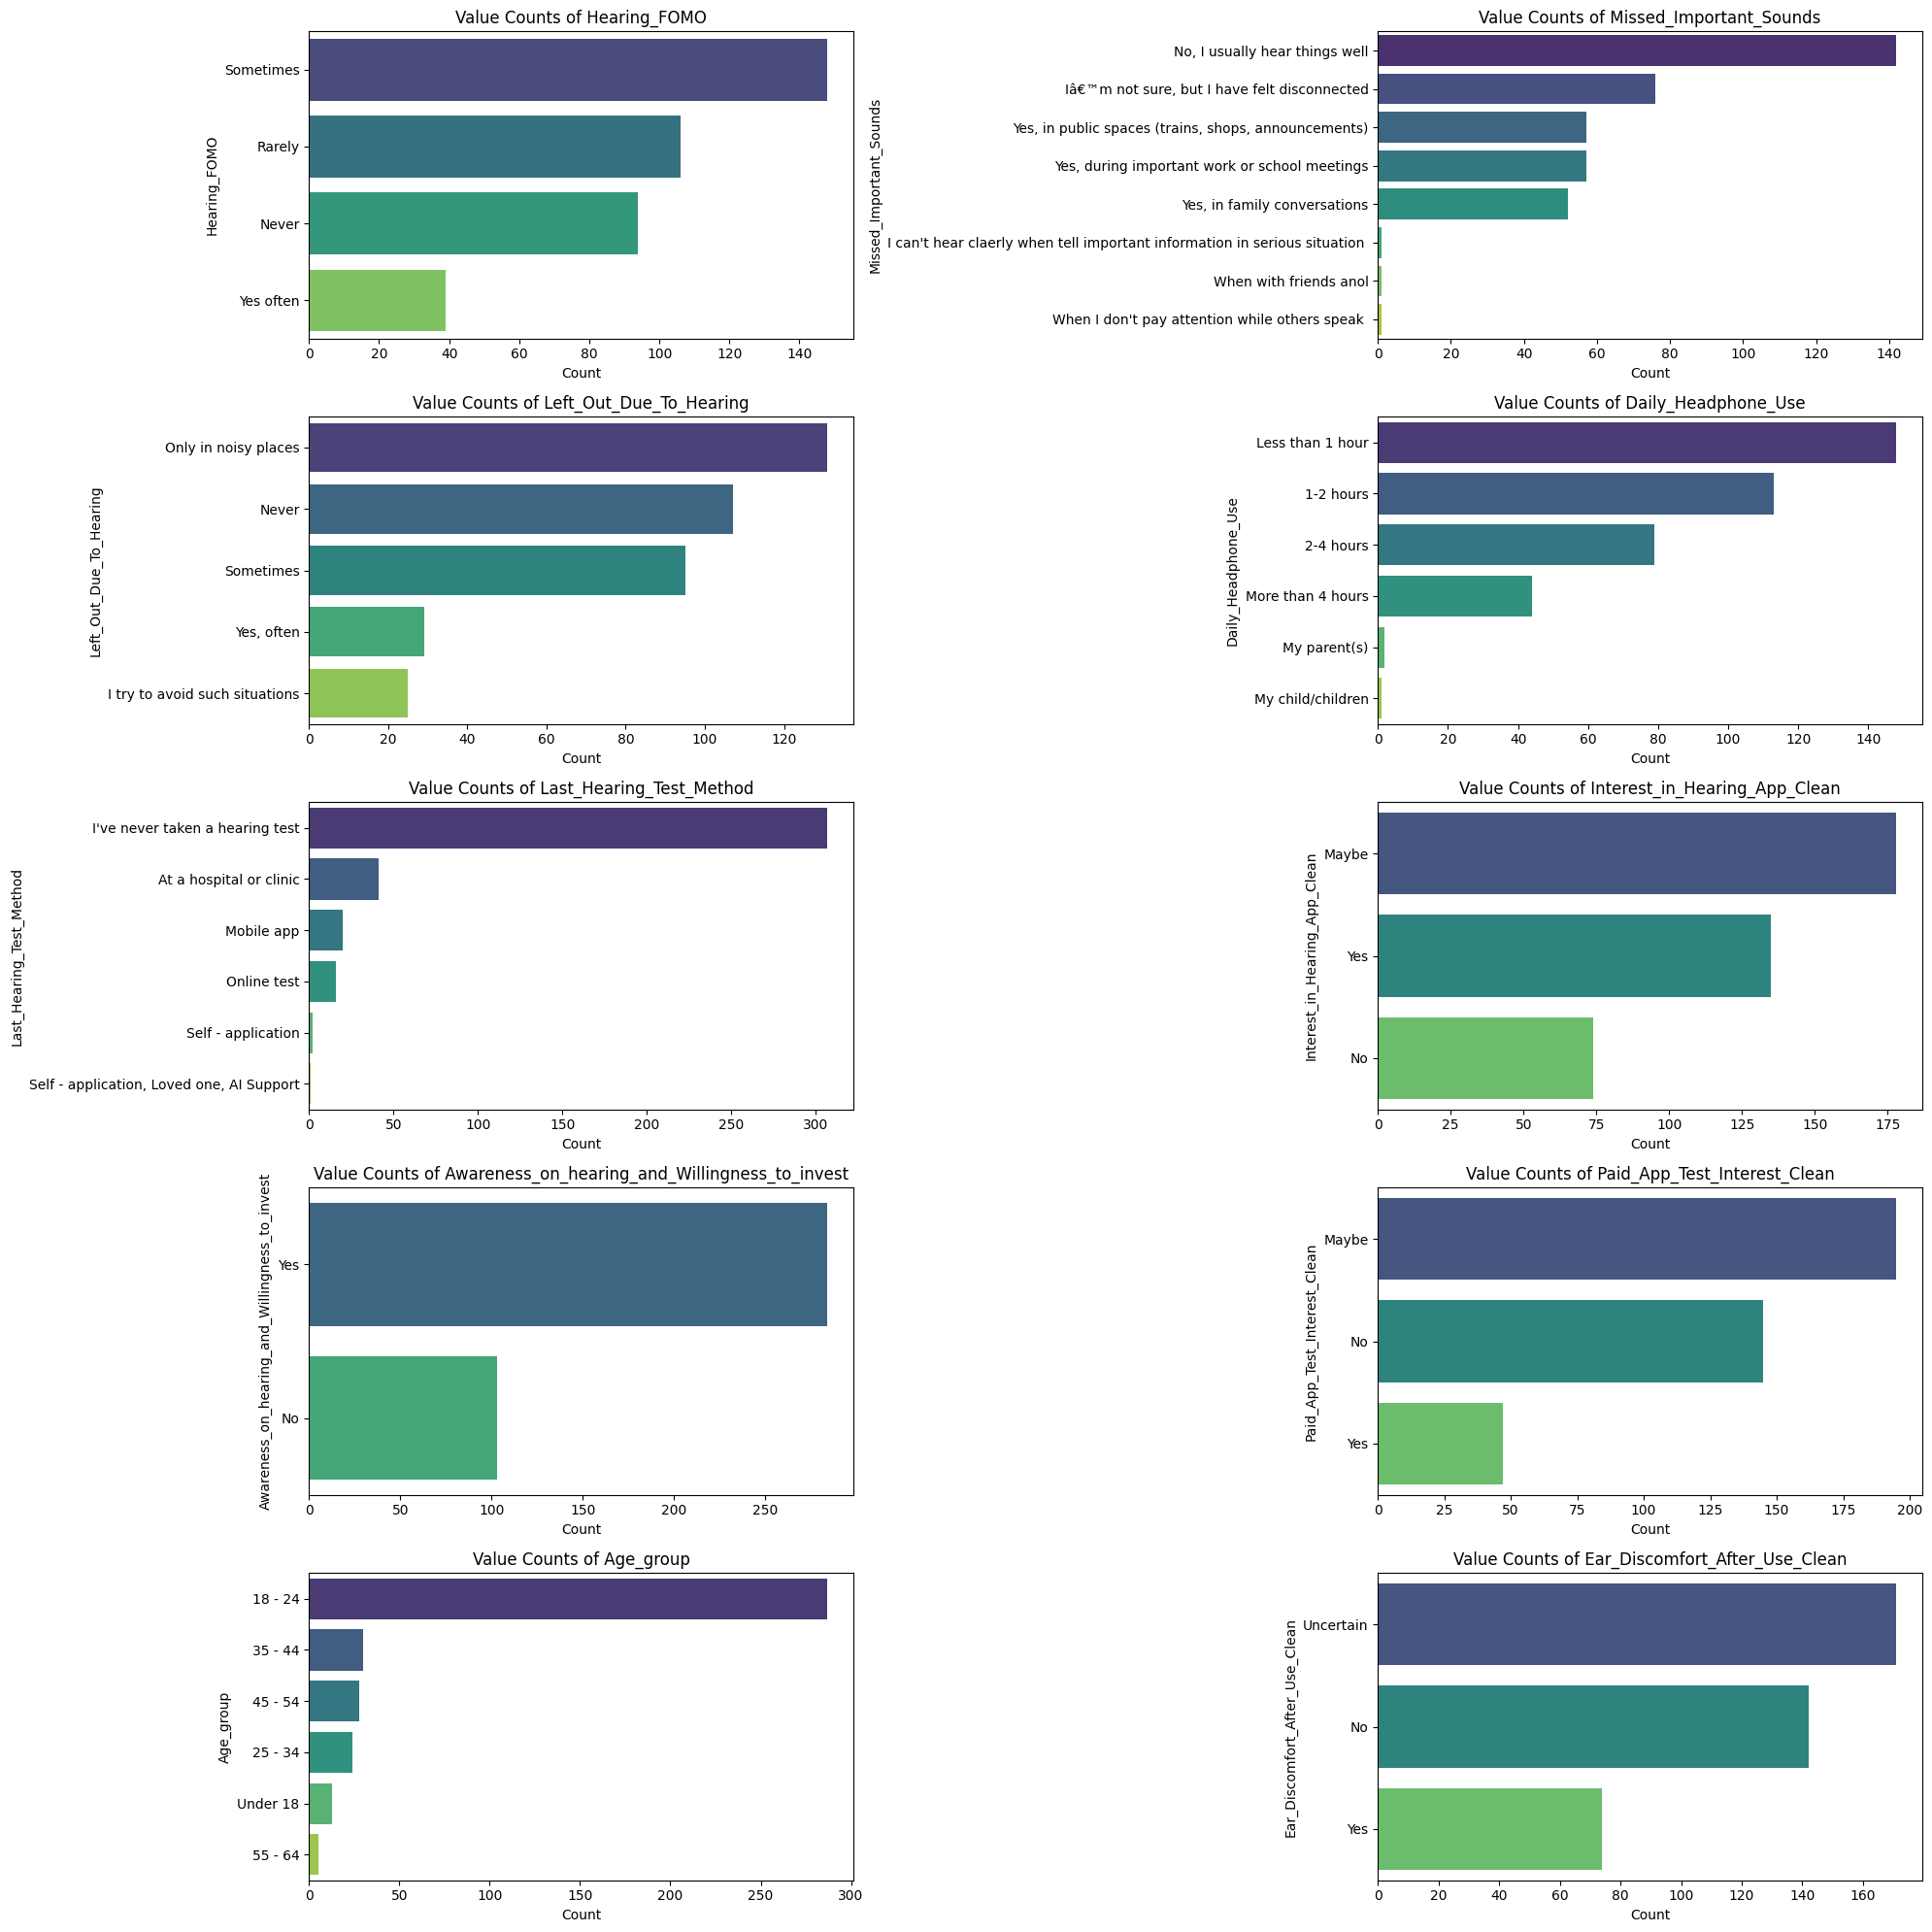

In [470]:
categorical_cols = [
    'Hearing_FOMO',
    'Missed_Important_Sounds',
    'Left_Out_Due_To_Hearing',
    'Daily_Headphone_Use',
    'Last_Hearing_Test_Method',
    'Interest_in_Hearing_App_Clean',
    'Awareness_on_hearing_and_Willingness_to_invest',
    'Paid_App_Test_Interest_Clean',
    'Age_group',
    'Ear_Discomfort_After_Use_Clean'
]

n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Value Counts of {col}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [471]:
hearing_fomo_by_agegroup = pd.crosstab(df['Age_group'], df['Hearing_FOMO'], normalize='index') * 100
hearing_fomo_by_agegroup

Hearing_FOMO,Never,Rarely,Sometimes,Yes often
Age_group,,,,
18 - 24,20.557491,27.177700,40.766551,11.498258
25 - 34,37.500000,25.000000,37.500000,0.000000
35 - 44,26.666667,26.666667,40.000000,6.666667
45 - 54,50.000000,28.571429,17.857143,3.571429
55 - 64,40.000000,40.000000,20.000000,0.000000
Under 18,15.384615,30.769231,30.769231,23.076923


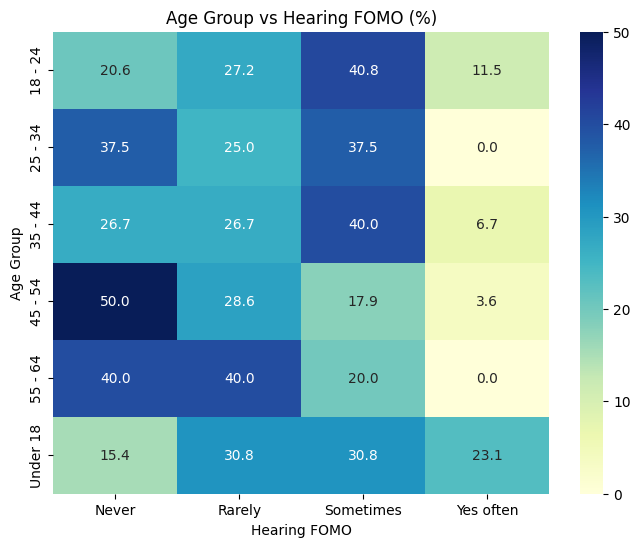

In [472]:

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(hearing_fomo_by_agegroup, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Age Group vs Hearing FOMO (%)")
plt.xlabel("Hearing FOMO")
plt.ylabel("Age Group")
plt.show()

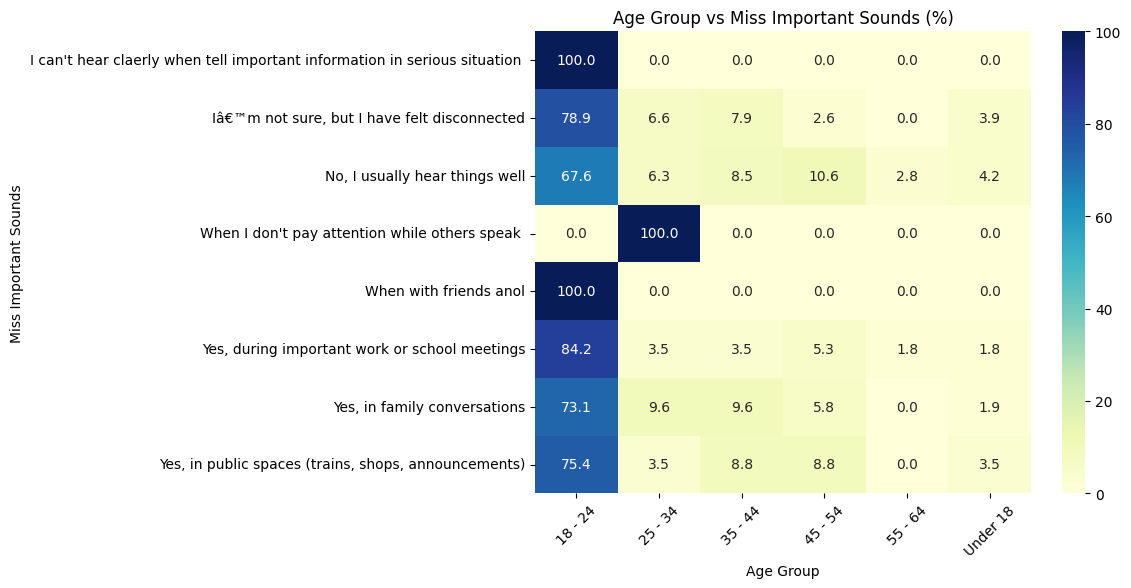

In [473]:
missed_important_sounds_by_agegroup = pd.crosstab(df['Missed_Important_Sounds'], df['Age_group'], normalize='index') * 100
missed_important_sounds_by_agegroup
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(missed_important_sounds_by_agegroup, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Age Group vs Miss Important Sounds (%)")
plt.ylabel("Miss Important Sounds")
plt.xlabel("Age Group")
plt.xticks(rotation = 45)
plt.show()

Left_Out_Due_To_Hearing  I try to avoid such situations      Never  \
Age_group                                                            
18 - 24                                        7.317073  25.435540   
25 - 34                                        4.166667  33.333333   
35 - 44                                        3.333333  30.000000   
45 - 54                                        3.571429  35.714286   
55 - 64                                        0.000000  60.000000   
Under 18                                       7.692308  30.769231   

Left_Out_Due_To_Hearing  Only in noisy places  Sometimes  Yes, often  
Age_group                                                             
18 - 24                             33.101045  25.783972    8.362369  
25 - 34                             45.833333  16.666667    0.000000  
35 - 44                             30.000000  30.000000    6.666667  
45 - 54                             35.714286  14.285714   10.714286  
55 - 64      

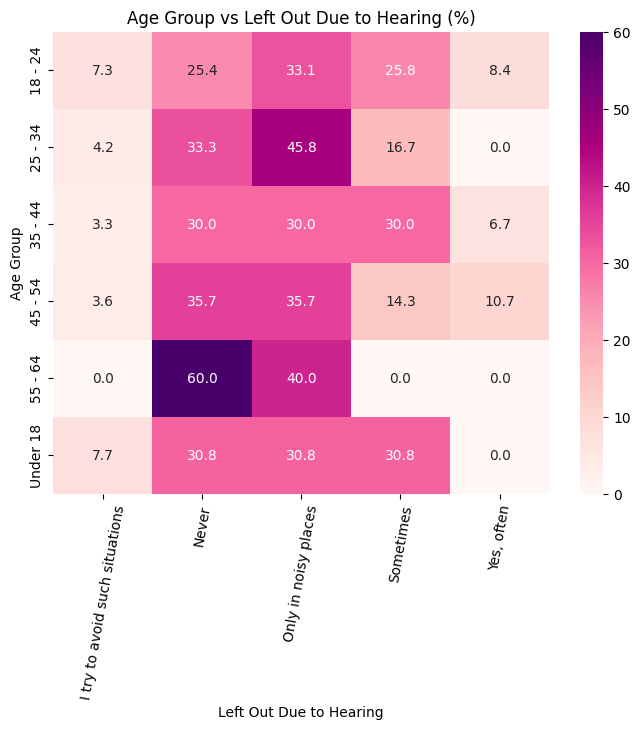

In [474]:
#Who is most likely to feel left out due to hearing? (Age trends)
left_out_dueto_hearing_app_by_agegroup = pd.crosstab(df['Age_group'], df['Left_Out_Due_To_Hearing'], normalize='index') * 100
print(left_out_dueto_hearing_app_by_agegroup)
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(left_out_dueto_hearing_app_by_agegroup, annot=True, fmt=".1f", cmap="RdPu")
plt.title("Age Group vs Left Out Due to Hearing (%)")
plt.xlabel("Left Out Due to Hearing")
plt.ylabel("Age Group")
plt.xticks(rotation = 80)
plt.show()

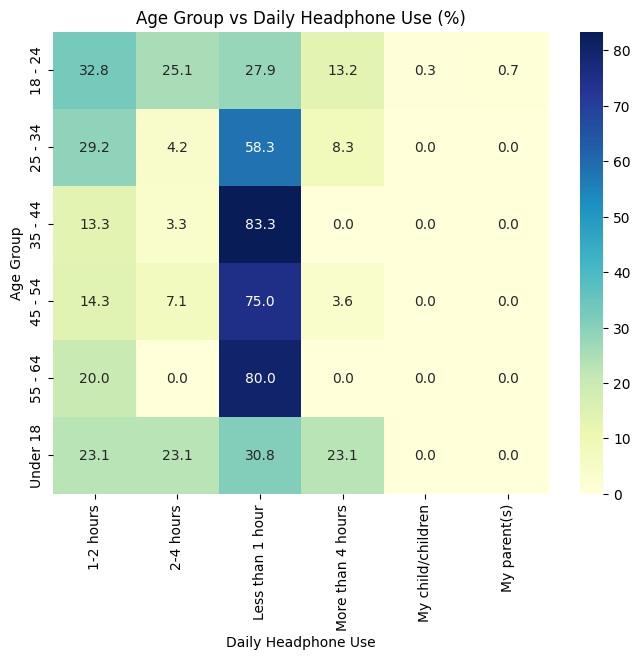

In [475]:
daily_hp_use_by_agegroup = pd.crosstab(df['Age_group'], df['Daily_Headphone_Use'], normalize='index') * 100
daily_hp_use_by_agegroup
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(daily_hp_use_by_agegroup, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Age Group vs Daily Headphone Use (%)")
plt.xlabel("Daily Headphone Use")
plt.ylabel("Age Group")
plt.show()

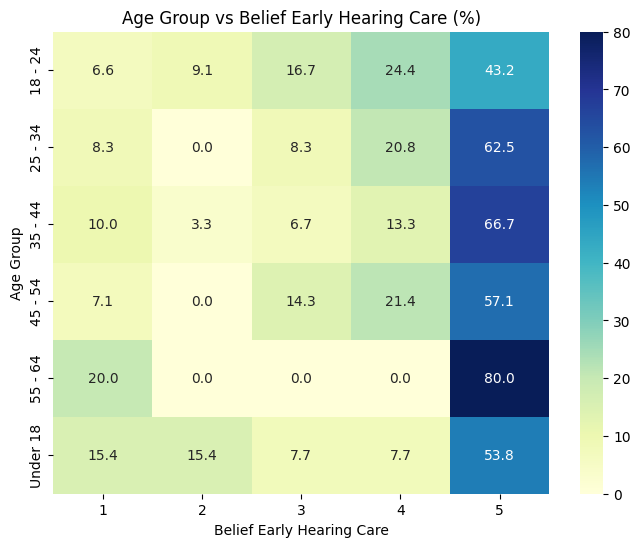

In [476]:
belief_early_care_agegroup = pd.crosstab(df['Age_group'], df['Belief_Early_Hearing_Care'], normalize='index') * 100
belief_early_care_agegroup
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(belief_early_care_agegroup, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Age Group vs Belief Early Hearing Care (%)")
plt.xlabel("Belief Early Hearing Care")
plt.ylabel("Age Group")
plt.show()

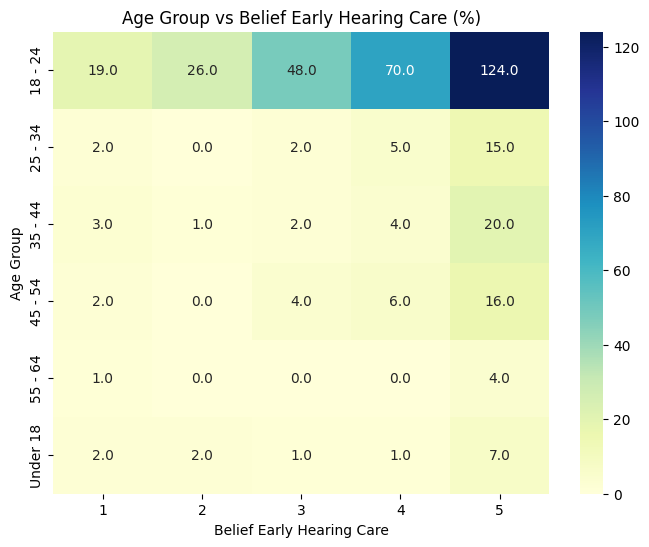

In [477]:
belief_early_care_agegroup = pd.crosstab(df['Age_group'], df['Belief_Early_Hearing_Care']) 
#belief_early_care_agegroup
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(belief_early_care_agegroup, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Age Group vs Belief Early Hearing Care (%)")
plt.xlabel("Belief Early Hearing Care")
plt.ylabel("Age Group")
plt.show()

C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\1291499419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_group', y='Belief_Early_Hearing_Care', palette="Set2")


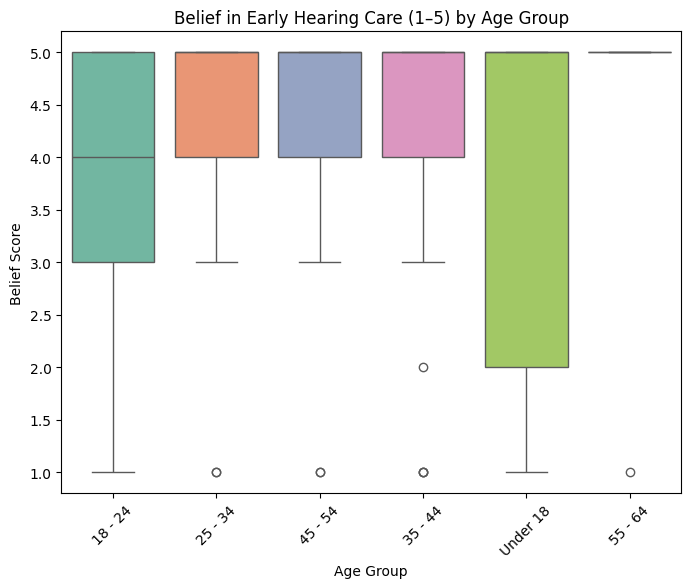

In [478]:
#Does belief in early hearing care differ across age groups?
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Age_group', y='Belief_Early_Hearing_Care', palette="Set2")
plt.title("Belief in Early Hearing Care (1–5) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Belief Score")
plt.xticks(rotation=45)
plt.show()


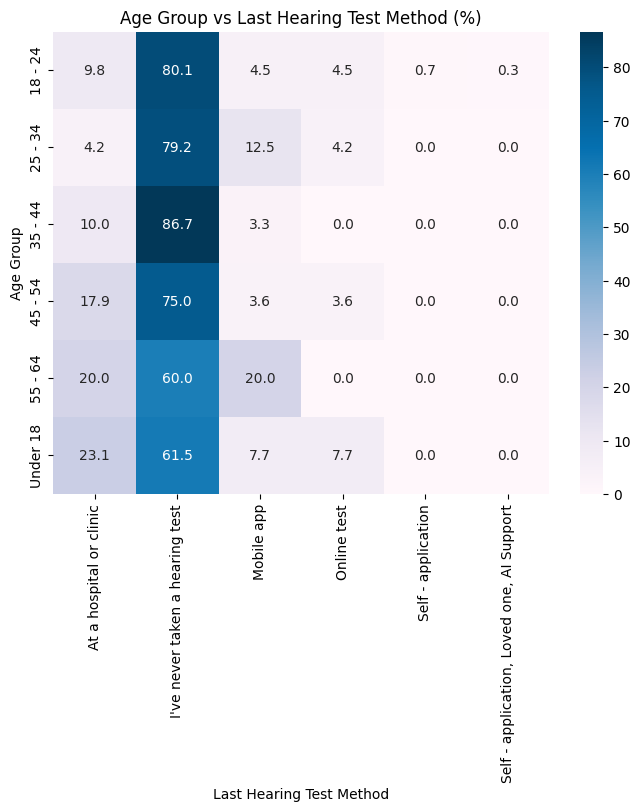

In [479]:
last_test_method_by_agegroup = pd.crosstab(df['Age_group'], df['Last_Hearing_Test_Method'], normalize='index') * 100
last_test_method_by_agegroup
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(last_test_method_by_agegroup, annot=True, fmt=".1f", cmap="PuBu")
plt.title("Age Group vs Last Hearing Test Method (%)")
plt.xlabel("Last Hearing Test Method")
plt.ylabel("Age Group")
plt.show()

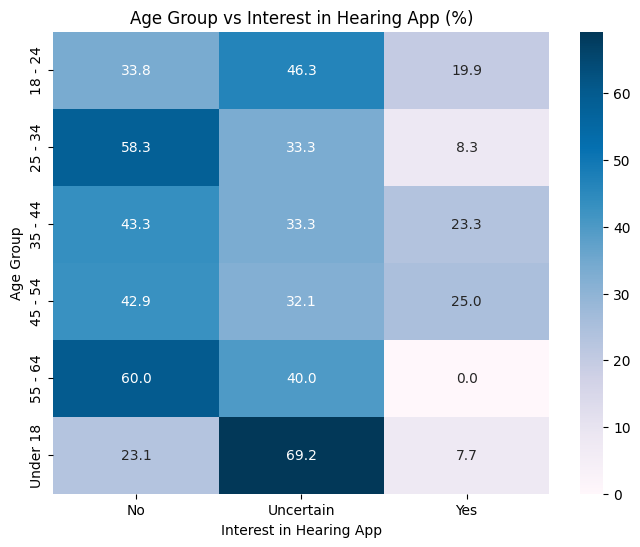

In [480]:
interest_in_hearing_app_by_agegroup = pd.crosstab(df['Age_group'], df['Ear_Discomfort_After_Use_Clean'], normalize='index') * 100
interest_in_hearing_app_by_agegroup
# # Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(interest_in_hearing_app_by_agegroup, annot=True, fmt=".1f", cmap="PuBu")
plt.title("Age Group vs Interest in Hearing App (%)")
plt.xlabel("Interest in Hearing App")
plt.ylabel("Age Group")
plt.show()

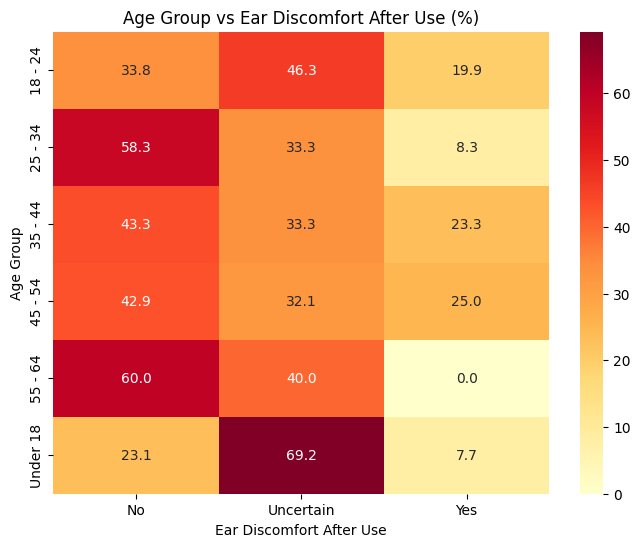

In [481]:
ear_discomfort_after_use_clean_by_age_group = pd.crosstab(df['Age_group'], df['Ear_Discomfort_After_Use_Clean'], normalize='index') * 100
ear_discomfort_after_use_clean_by_age_group
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(ear_discomfort_after_use_clean_by_age_group, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Age Group vs Ear Discomfort After Use (%)")
plt.xlabel("Ear Discomfort After Use")
plt.ylabel("Age Group")
plt.show()

Paid_App_Test_Interest_Clean                        Maybe         No  \
Awareness_on_hearing_and_Willingness_to_invest                         
No                                              39.805825  58.252427   
Yes                                             54.225352  29.929577   

Paid_App_Test_Interest_Clean                          Yes  
Awareness_on_hearing_and_Willingness_to_invest             
No                                               1.941748  
Yes                                             15.845070  


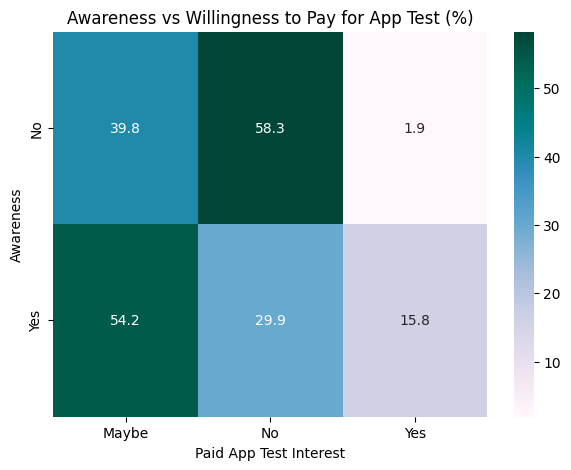

In [482]:
#Is willingness to pay linked with awareness?
paid_app_test_interest_by_awareness = pd.crosstab(
    df['Awareness_on_hearing_and_Willingness_to_invest'], 
    df['Paid_App_Test_Interest_Clean'], 
    normalize='index'
) * 100

print(paid_app_test_interest_by_awareness)

plt.figure(figsize=(7,5))
sns.heatmap(paid_app_test_interest_by_awareness, annot=True, fmt=".1f", cmap="PuBuGn")
plt.title("Awareness vs Willingness to Pay for App Test (%)")
plt.xlabel("Paid App Test Interest")
plt.ylabel("Awareness")
plt.show()

# Multiple Respnse Columns

In [483]:
# Split responses into multiple rows
features_split = df['Desired_App_Features'].dropna().str.split(',')  # adjust delimiter if needed

# Flatten into a single series
features_exploded = features_split.explode().str.strip()

# Count frequency
feature_counts = features_exploded.value_counts().reset_index()
feature_counts.columns = ['Feature', 'Count']

print(feature_counts.head())


                  Feature  Count
0             Quick tests    245
1     Doctor consultation    181
2  Game-based interaction    164
3    Earphone calibration    152
4           Soft guidance    150


C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\264013949.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(


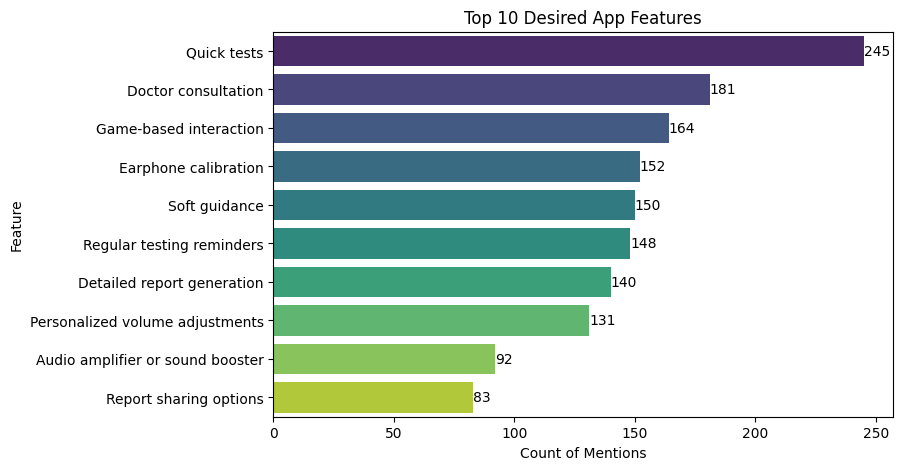

In [484]:
# sns.barplot(data=feature_counts, y='Feature', x='Count', palette='viridis')
# plt.title("Most Desired App Features")
# plt.xlabel("Count of Mentions")
# plt.ylabel("Feature")
# plt.show()
plt.figure(figsize=(8,5))
ax =sns.barplot(
    data=feature_counts.head(10), 
    y='Feature', 
    x='Count', 
    palette='viridis'
)
# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')   # integer format
plt.title("Top 10 Desired App Features")
plt.xlabel("Count of Mentions")
plt.ylabel("Feature")
plt.show()


In [485]:
#pip install wordcloud

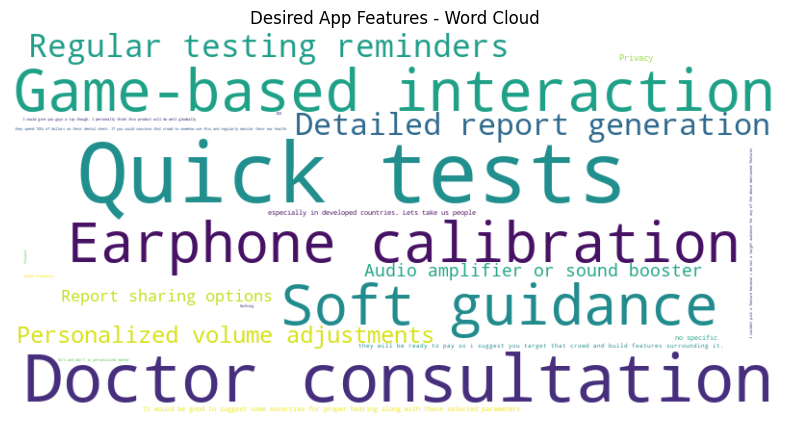

In [486]:
# Convert frequencies into dictionary
freq_dict = dict(zip(feature_counts['Feature'], feature_counts['Count']))

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dict)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')   # integer format
plt.title("Desired App Features - Word Cloud")
plt.show()


In [487]:
features_split = df['Hearing_Test_Barrier'].dropna().str.split(',')  # adjust delimiter if needed

# Flatten into a single series
features_exploded = features_split.explode().str.strip()

# Count frequency
feature_counts = features_exploded.value_counts().reset_index()
feature_counts.columns = ['Feature', 'Count']
print(feature_counts.head())

             Feature  Count
0  Lack of awareness    260
1               Fear     55
2               Cost     34
3              Shame     23
4                         7


C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\504315888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\t964315\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\t964315\AppData\Local\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 143 (\x8f) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


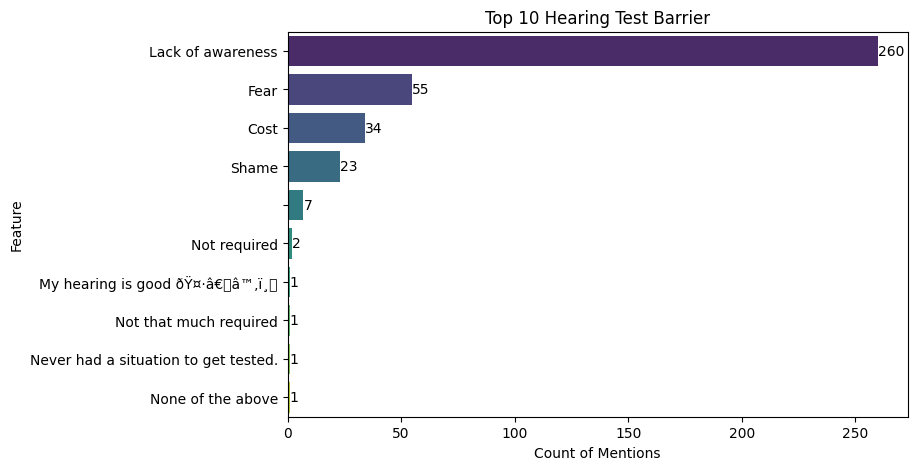

In [488]:
# Sort features by count and keep only top 10
top10_features = feature_counts.sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=top10_features, 
    y='Feature', 
    x='Count', 
    palette='viridis'
)

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Top 10 Hearing Test Barrier")
plt.xlabel("Count of Mentions")
plt.ylabel("Feature")
plt.show()



In [489]:
features_split = df['Perceived_Hearing_Meaning'].dropna().str.split(',')  # adjust delimiter if needed

# Flatten into a single series
features_exploded = features_split.explode().str.strip()

# Count frequency
feature_counts = features_exploded.value_counts().reset_index()
feature_counts.columns = ['Feature', 'Count']
print(feature_counts.head())

                              Feature  Count
0    Staying connected with the world    187
1  Enjoying music / laughter and life    184
2         Feeling close to loved ones    102
3       Staying independent and alert     94
4   I havenâ€™t thought about it much     43


C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\2169375373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


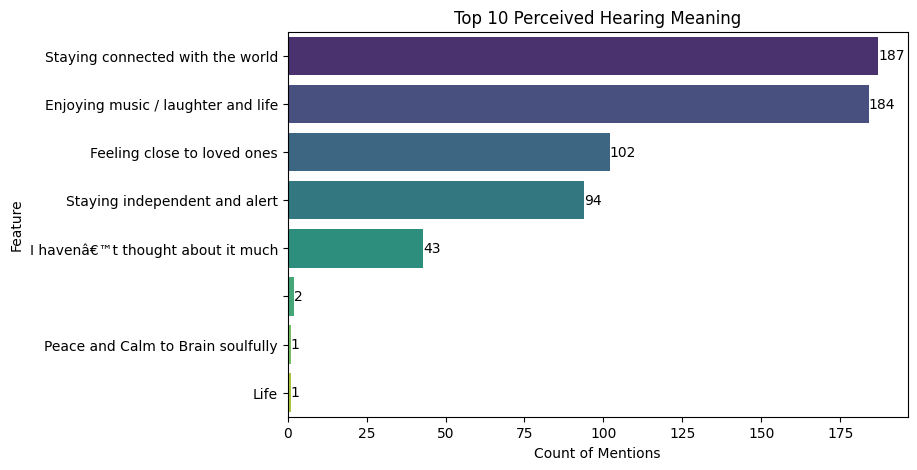

In [490]:
# Sort features by count and keep only top 10
top10_features = feature_counts.sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=top10_features, 
    y='Feature', 
    x='Count', 
    palette='viridis'
)

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Top 10 Perceived Hearing Meaning")
plt.xlabel("Count of Mentions")
plt.ylabel("Feature")
plt.show()

In [491]:
df['Missed_Important_Sounds_Clean'] = df['Missed_Important_Sounds'].replace(
    {
        'Yes, in family conversations': 'Yes',
        'Yes, in public spaces (trains, shops, announcements)': 'Yes',
        'Yes, during important work or school meetings': 'Yes'
    }
)
df.Missed_Important_Sounds_Clean

0                                 Yes
1                                 Yes
2                                 Yes
3                                 Yes
4      No, I usually hear things well
                    ...              
382                               Yes
383                               Yes
384                               Yes
385    No, I usually hear things well
386    No, I usually hear things well
Name: Missed_Important_Sounds_Clean, Length: 387, dtype: object

__summary table for Age Group × Risk Factors__

           FOMO_%  Missed_Sounds_%  Left_Out_%  Discomfort_%  Belief_Score
Age_group                                                                 
18 - 24      11.5             44.9         8.4          19.9           3.9
25 - 34       0.0             37.5         0.0           8.3           4.3
35 - 44       6.7             40.0         6.7          23.3           4.2
45 - 54       3.6             39.3        10.7          25.0           4.2
55 - 64       0.0             20.0         0.0           0.0           4.2
Under 18     23.1             30.8         0.0           7.7           3.7


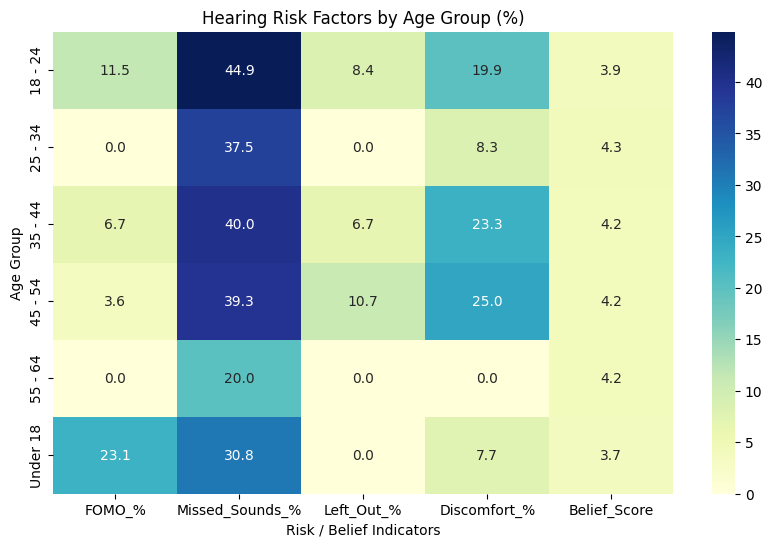

In [492]:
# Define mappings for Yes-like responses
yes_like_fomo = ['Yes', 'Yes often']
yes_like_leftout = ['Yes', 'Yes, often']
yes_like_discomfort = ['Yes']

# Create a summary table for Age Group × Risk Factors
summary = pd.DataFrame()

# % Hearing FOMO
summary['FOMO_%'] = df.groupby('Age_group')['Hearing_FOMO'].apply(
    lambda x: x.isin(yes_like_fomo).mean()*100
)

# % Missed Important Sounds 
summary['Missed_Sounds_%'] = df.groupby('Age_group')['Missed_Important_Sounds_Clean'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
# % Left Out Due To Hearing 
summary['Left_Out_%'] = df.groupby('Age_group')['Left_Out_Due_To_Hearing'].apply(
    lambda x: x.isin(yes_like_leftout).mean()*100
)

# % Ear Discomfort (Yes only)
summary['Discomfort_%'] = df.groupby('Age_group')['Ear_Discomfort_After_Use_Clean'].apply(
    lambda x: x.isin(yes_like_discomfort).mean()*100
)

# Average Belief Score
summary['Belief_Score'] = df.groupby('Age_group')['Belief_Early_Hearing_Care'].mean()

# Round numbers
summary = summary.round(1)

print(summary)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(summary, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Hearing Risk Factors by Age Group (%)")
plt.xlabel("Risk / Belief Indicators")
plt.ylabel("Age Group")
plt.show()

__Awareness vs. Headphone Use__

<Figure size 800x500 with 0 Axes>

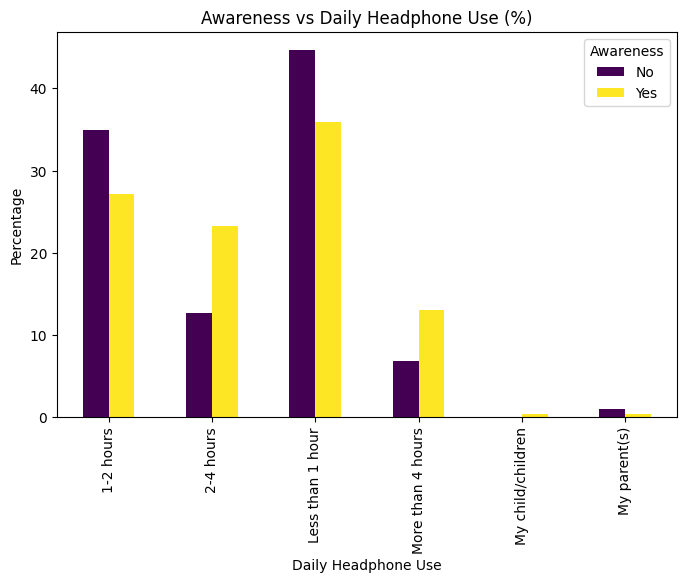

In [493]:
# Awareness vs. Headphone Use
ct_headphone = pd.crosstab(df['Awareness_on_hearing_and_Willingness_to_invest'], df['Daily_Headphone_Use'], normalize='index') * 100

plt.figure(figsize=(8,5))
ct_headphone.T.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("Awareness vs Daily Headphone Use (%)")
plt.ylabel("Percentage")
plt.xlabel("Daily Headphone Use")
plt.legend(title="Awareness")
plt.show()


__Awareness vs. Ear Discomfort__

<Figure size 800x500 with 0 Axes>

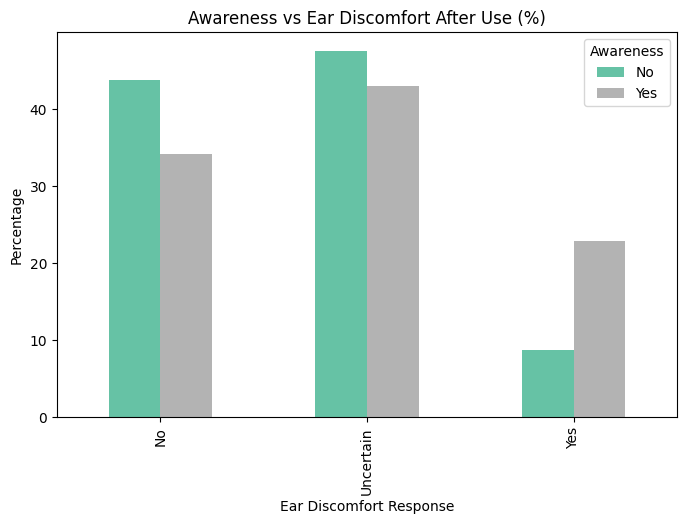

In [494]:
# Awareness vs. Ear Discomfort
ct_discomfort = pd.crosstab(df['Awareness_on_hearing_and_Willingness_to_invest'], df['Ear_Discomfort_After_Use_Clean'], normalize='index') * 100

plt.figure(figsize=(8,5))
ct_discomfort.T.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.title("Awareness vs Ear Discomfort After Use (%)")
plt.ylabel("Percentage")
plt.xlabel("Ear Discomfort Response")
plt.legend(title="Awareness")
plt.show()


__Belief in Early Care vs. Last Hearing Test Method__

C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\3285135706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Last_Hearing_Test_Method', y='Belief_Early_Hearing_Care', palette="muted")


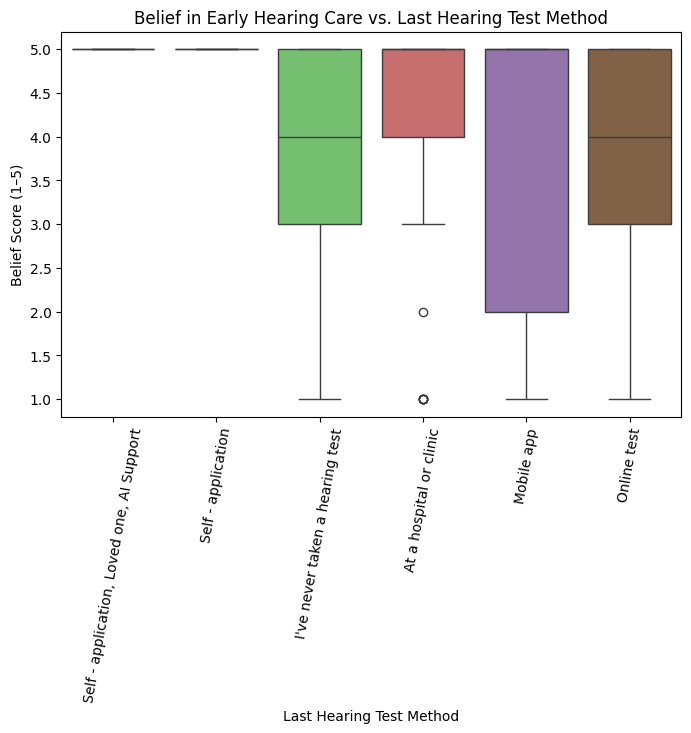

In [495]:
#Belief in Early Care vs. Last Hearing Test Method
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Last_Hearing_Test_Method', y='Belief_Early_Hearing_Care', palette="muted")
plt.title("Belief in Early Hearing Care vs. Last Hearing Test Method")
plt.xlabel("Last Hearing Test Method")
plt.ylabel("Belief Score (1–5)")
plt.xticks(rotation=80)
plt.show()


__Average belief score by test method__

C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\3029953660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=belief_means, x='Last_Hearing_Test_Method', y='Belief_Early_Hearing_Care', palette="viridis")


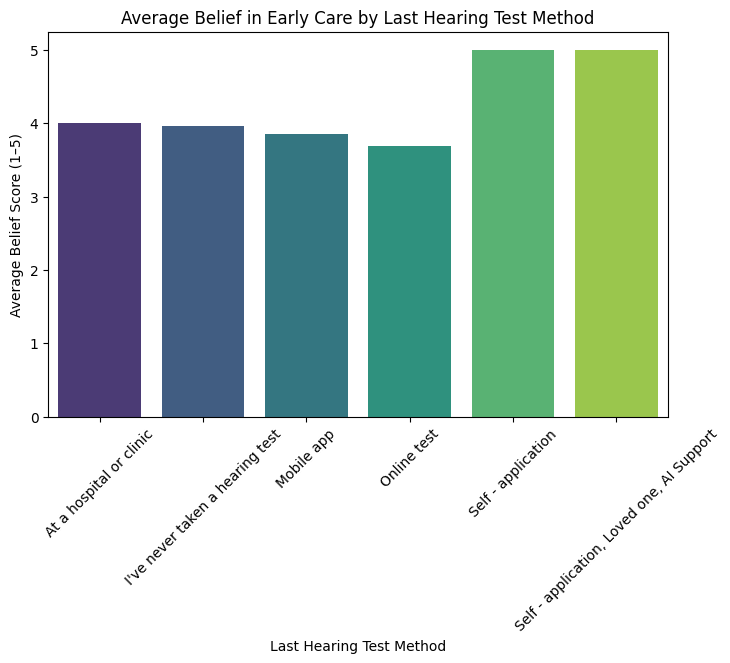

In [496]:
# Average belief score by test method
belief_means = df.groupby('Last_Hearing_Test_Method')['Belief_Early_Hearing_Care'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=belief_means, x='Last_Hearing_Test_Method', y='Belief_Early_Hearing_Care', palette="viridis")
plt.title("Average Belief in Early Care by Last Hearing Test Method")
plt.xlabel("Last Hearing Test Method")
plt.ylabel("Average Belief Score (1–5)")
plt.xticks(rotation=45)
plt.show()


**Awareness × Paid App Interest × Age_group (3-way breakdown)**

In [497]:
#Crosstab **Awareness × Paid App Interest × Age_group** (3-way breakdown).
ct = pd.crosstab(
    [df['Age_group'], df['Awareness_on_hearing_and_Willingness_to_invest']],   # index = Age + Awareness
    df['Paid_App_Test_Interest_Clean'],         # columns = Paid App Interest
    normalize='index'                           # row percentages
) * 100

print(ct.round(1))

Paid_App_Test_Interest_Clean                              Maybe    No   Yes
Age_group Awareness_on_hearing_and_Willingness_to_invest                   
18 - 24   No                                               43.2  54.1   2.7
          Yes                                              55.9  29.6  14.6
25 - 34   No                                               62.5  37.5   0.0
          Yes                                              37.5  50.0  12.5
35 - 44   No                                               40.0  60.0   0.0
          Yes                                              56.0  20.0  24.0
45 - 54   No                                                8.3  91.7   0.0
          Yes                                              37.5  37.5  25.0
55 - 64   Yes                                              40.0  40.0  20.0
Under 18  No                                               25.0  75.0   0.0
          Yes                                              77.8  11.1  11.1


C:\Users\t964315\AppData\Local\Temp\ipykernel_21144\4129193777.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


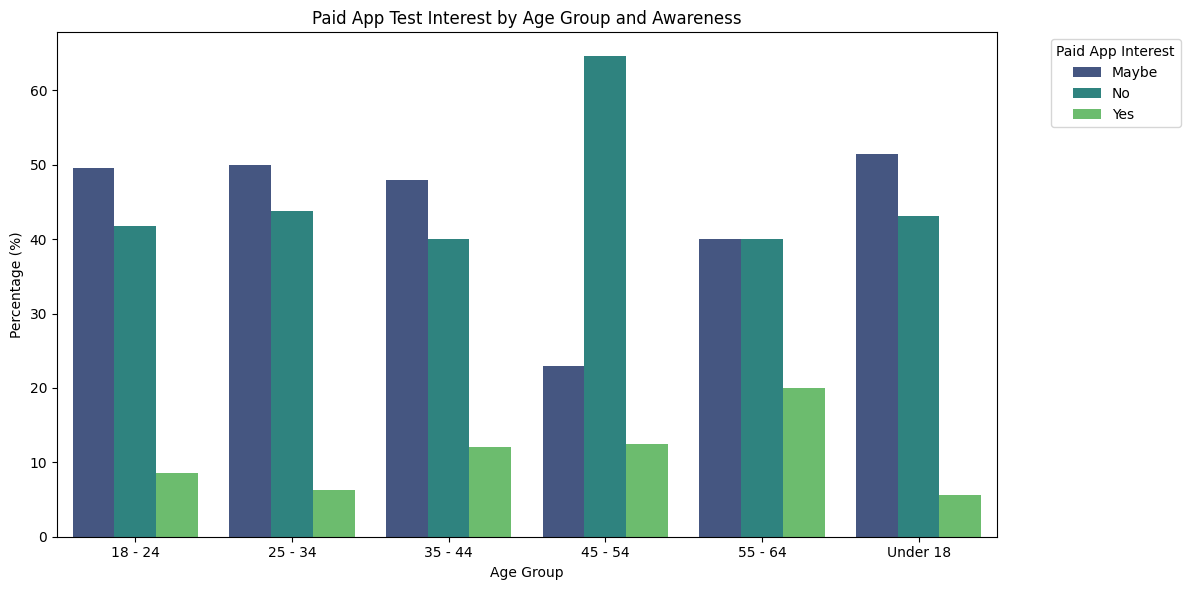

In [498]:
# Reset index for plotting
ct_reset = ct.reset_index()

# Melt for seaborn
ct_melted = ct_reset.melt(
    id_vars=['Age_group','Awareness_on_hearing_and_Willingness_to_invest'], 
    var_name='Paid_App_Interest', 
    value_name='Percentage'
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=ct_melted, 
    x='Age_group', 
    y='Percentage', 
    hue='Paid_App_Interest', 
    palette='viridis', 
    ci=None
)

plt.title("Paid App Test Interest by Age Group and Awareness")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.legend(title="Paid App Interest", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Analysis Report

- The survey data consists of **387 respondents** who shared their views on hearing well-being, app interest, and hearing care practices.
- “**Quick tests**” stand out as the most desired app feature, followed by “Doctor consultation” and “Game-based interaction.”
- The **top perceived meaning of hearing** is “Staying connected with the world” and “Enjoying music / laughter and life,” showing that hearing is strongly tied to social and emotional well-being.
- The **biggest barrier to hearing tests** is “Lack of awareness,” which far outweighs cost, fear, or shame.
- **Younger groups (18–24, Under 18)** report higher headphone use and ear discomfort, while **older groups (45+)** report missing important sounds and feeling left out.
- Belief in early hearing care is generally **strong across all ages**, with older respondents scoring slightly higher.
- Awareness of hearing care does not always reduce risky behaviors—both aware and unaware groups show similar headphone usage patterns.
- Willingness to pay for app-based hearing tests is **uncertain**, with most respondents answering “Maybe,” indicating sensitivity to cost and perceived value.
- In conclusion, the data shows that while people value hearing for connection and joy, **low awareness and mixed trust in digital tools** are barriers. The insights can support strategies in awareness campaigns, targeted interventions by age group, and development of affordable, reliable hearing apps.

# Reference from Kaggle

In [499]:
def analyze_categorical_column(column_name, df, top_n=10):
    print(f"\n=== {column_name} Analysis ===")
    print(f"Unique values: {df[column_name].nunique()}")
    
    # Count values and percentages
    value_counts = df[column_name].value_counts()
    percentages = df[column_name].value_counts(normalize=True) * 100
    
    print("\nTop values:")
    for i, (val, count) in enumerate(value_counts.head(top_n).items()):
        print(f"{i+1}. {val}: {count} ({percentages[val]:.1f}%)")
    
    return value_counts

In [500]:
categorical_columns = [
    'Perceived_Hearing_Meaning', 'Hearing_FOMO', 'Hearing_Test_Barrier',
    'Missed_Important_Sounds', 'Left_Out_Due_To_Hearing', 'Daily_Headphone_Use',
    'Last_Hearing_Test_Method', 'Interest_in_Hearing_App', 'Desired_App_Features'
]

for col in categorical_columns:
    analyze_categorical_column(col, df)


=== Perceived_Hearing_Meaning Analysis ===
Unique values: 25

Top values:
1. Staying connected with the world: 78 (20.2%)
2. Enjoying music / laughter and life: 77 (19.9%)
3. Feeling close to loved ones: 36 (9.3%)
4. Enjoying music / laughter and life, Staying connected with the world: 33 (8.5%)
5. I havenâ€™t thought about it much: 32 (8.3%)
6. Staying independent and alert: 28 (7.2%)
7. Feeling close to loved ones, Staying independent and alert, Enjoying music / laughter and life, Staying connected with the world: 20 (5.2%)
8. Feeling close to loved ones, Enjoying music / laughter and life, Staying connected with the world: 17 (4.4%)
9. Staying independent and alert, Enjoying music / laughter and life, Staying connected with the world: 16 (4.1%)
10. Staying independent and alert, Staying connected with the world: 10 (2.6%)

=== Hearing_FOMO Analysis ===
Unique values: 4

Top values:
1. Sometimes: 148 (38.2%)
2. Rarely: 106 (27.4%)
3. Never: 94 (24.3%)
4. Yes often: 39 (10.1%)

=== H